## Tic-Tac-Toe Agent

In this notebook, you will learn to build an RL agent (using Q-learning) that learns to play Numerical Tic-Tac-Toe with odd numbers. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. The following is the layout of the notebook:
        - Defining epsilon-greedy strategy
        - Tracking state-action pairs for convergence
        - Define hyperparameters for the Q-learning algorithm
        - Generating episode and applying Q-update equation
        - Checking convergence in Q-values

### Importing libraries
Write the code to import Tic-Tac-Toe class from the environment file

In [1]:
from TCGame_Env1 import TicTacToe 
import collections
import numpy as np
import random
import pickle
import time
from matplotlib import pyplot as plt

In [2]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [3]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):

    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]] ###### -------please call your environment as env
    return valid_Actions

In [4]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

Epsilon-greedy strategy - Write your code here
(you can build your epsilon-decay function similar to the one given at the end of the notebook)

In [5]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy

def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
       # possible_action = [i for i in env.action_space(state)[0]]        
        action = random.choice(valid_actions(state))
    
    return action

In [6]:
#### Tracking the state-action pairs for checking convergence - write your code here

In [7]:
# Initialise Q_dictionary as 'Q_dict' and States_tracked as 'States_track' (for convergence)
Q_dict = collections.defaultdict(dict)

States_track = collections.defaultdict(dict)

In [8]:
# Initialise states to be tracked
def initialise_tracking_states():
    sample_q_values = [('x-1-x-4-x-x-x-x-x',(0,3)),('x-x-1-x-x-x-x-4-x',(1,5)),('x-x-5-x-x-x-x-2-x',(1,7)),('x-x-x-x-5-2-x-7-8',(2,9)),('2-6-x-x-x-9-3-x-x',(2,7))]    #select any 4 Q-values
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []   #this is an array which will have appended values of that state-action pair for every 2000th episode
  
  
  
  

In [9]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action])

In [10]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [21]:
#Defining parameters for the experiment

EPISODES = 5000000
#EPISODES = 20
#STEPS = 5
#STEPS = 30                 #for 30 days
LR = 0.01                   #learning rate
GAMMA = 0.91


max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.001        # epsilon decay rate
threshold = 2000       # no of episodes after which states_tracked wwill be saved
policy_threshold = 30000 

In [22]:
### Q-update loop ---write your code here

In [23]:
start_time = time.time()

for episode in range(EPISODES):
    ##### Start writing your code from the next line
    env = TicTacToe() #creating an instance of the class
    initial_state = env.state   
    curr_state = env.state
    curr_state_format = Q_state(curr_state)
    add_to_dict(curr_state)
    #time_step = 0
    reward = None
    #curr_action = (np.random.choice(np.arange(0,9)) ,np.random.choice(np.arange(0,10)))    
    total_reward = 0
    terminal =False
    #curr_state = next_state       #state_tue became state(t-1)
    
    #note that curr_state is always previous day evening's stock
    
     
    while not terminal:    #the episode will run only for a few steps and not infinitely
        
        #print(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)
        next_state, reward ,terminal = env.step(curr_state, curr_action)
        add_to_dict(next_state)
        next_state_format = Q_state(next_state) 
        
        if terminal == False:
            max_next = max(Q_dict[next_state_format],key=Q_dict[next_state_format].get)   #this gets the action corresponding to max q-value of next state
            Q_dict[Q_state(curr_state)][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state_format][max_next])))
                                                      - Q_dict[Q_state(curr_state)][curr_action]) 
        else :
            Q_dict[Q_state(curr_state)][curr_action] += LR * ((reward - Q_dict[Q_state(curr_state)][curr_action]))
            
        curr_state = next_state       #state(t) became state(t-1)
        
        total_reward += reward
         

    

    
    #TRACKING Q-VALUES
    if (episode == threshold-1):        #at the 1999th episode
        initialise_tracking_states()
      
    if ((episode+1) % threshold) == 0:   #every 2000th episode
        save_tracking_states()
        save_obj(States_track,'States_tracked')   
    
    #SAVING POLICY
    if ((episode+1)% policy_threshold ) == 0:  #every 30000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy') 
        print('EPISODE', episode+1)  
        
        
      
    
elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

EPISODE 30000
EPISODE 60000
EPISODE 90000
EPISODE 120000
EPISODE 150000
EPISODE 180000
EPISODE 210000
EPISODE 240000
EPISODE 270000
EPISODE 300000
EPISODE 330000
EPISODE 360000
EPISODE 390000
EPISODE 420000
EPISODE 450000
EPISODE 480000
EPISODE 510000
EPISODE 540000
EPISODE 570000
EPISODE 600000
EPISODE 630000
EPISODE 660000
EPISODE 690000
EPISODE 720000
EPISODE 750000
EPISODE 780000
EPISODE 810000
EPISODE 840000
EPISODE 870000
EPISODE 900000
EPISODE 930000
EPISODE 960000
EPISODE 990000
EPISODE 1020000
EPISODE 1050000
EPISODE 1080000
EPISODE 1110000
EPISODE 1140000
EPISODE 1170000
EPISODE 1200000
EPISODE 1230000
EPISODE 1260000
EPISODE 1290000
EPISODE 1320000
EPISODE 1350000
EPISODE 1380000
EPISODE 1410000
EPISODE 1440000
EPISODE 1470000
EPISODE 1500000
EPISODE 1530000
EPISODE 1560000
EPISODE 1590000
EPISODE 1620000
EPISODE 1650000
EPISODE 1680000
EPISODE 1710000
EPISODE 1740000
EPISODE 1770000
EPISODE 1800000
EPISODE 1830000
EPISODE 1860000
EPISODE 1890000
EPISODE 1920000
EPISODE 1950

#### Check the Q-dictionary

In [24]:
Q_dict

defaultdict(dict,
            {'x-x-x-x-x-x-x-x-x': {(0, 1): -1.2379453078687987,
              (0, 3): -1.23610513738966,
              (0, 5): -1.2416493678654608,
              (0, 7): -1.2419732853744792,
              (0, 9): -1.2317026038934717,
              (1, 1): -1.2383547917303388,
              (1, 3): -1.2380247336004853,
              (1, 5): 5.457429291845349,
              (1, 7): -1.239343024804725,
              (1, 9): -1.2379594089966692,
              (2, 1): -1.239956179170207,
              (2, 3): -1.2427389297021676,
              (2, 5): -1.2350255500591185,
              (2, 7): -1.2430533538986763,
              (2, 9): -1.235646795421185,
              (3, 1): -1.2385173501921145,
              (3, 3): -1.240871975077216,
              (3, 5): -1.240059953777902,
              (3, 7): -1.241824194376124,
              (3, 9): -1.2414964875289982,
              (4, 1): -1.238142933674185,
              (4, 3): -1.2385240772043205,
              (4, 5): -1.2

In [25]:
len(Q_dict)

1366245

#### Check the states tracked for Q-values convergence
(non-evaluative)

In [24]:
# Write the code for plotting the graphs for state-action pairs tracked

In [26]:

with open('States_tracked.pkl', 'rb') as handle:
    States_track = pickle.load(handle)

In [27]:
States_track

defaultdict(dict,
            {'x-x-5-x-8-x-x-x-x': {},
             'x-1-x-4-x-x-x-x-x': {(0, 3): [-0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.01,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0199,
               -0.0

In [28]:

for key, value in States_track.items():
    for k,v in value.items():
        print(len(v))

2500
2500
2499
2133
2432


In [29]:

for key, value in States_track.items():
    for k,v in value.items():
        print(key, k)

x-1-x-4-x-x-x-x-x (0, 3)
x-x-1-x-x-x-x-4-x (1, 5)
x-x-5-x-x-x-x-2-x (1, 7)
x-x-x-x-5-2-x-7-8 (2, 9)
2-6-x-x-x-9-3-x-x (2, 7)


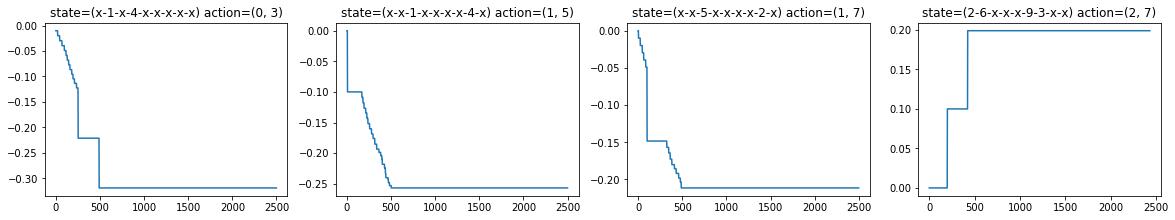

In [31]:


xaxis = np.asarray(range(0, len(States_track['x-1-x-4-x-x-x-x-x'][(0, 3)])))
plt.figure(0, figsize=(20,7))
plt.subplot(241)
plt.title('state=(x-1-x-4-x-x-x-x-x) action=(0, 3)')
plt.plot(xaxis,np.asarray(States_track['x-1-x-4-x-x-x-x-x'][(0,3)]))
#Figure 2:
xaxis = np.asarray(range(0, len(States_track['x-x-1-x-x-x-x-4-x'][(1, 5)])))
plt.subplot(242)
plt.title('state=(x-x-1-x-x-x-x-4-x) action=(1, 5)')
plt.plot(xaxis,np.asarray(States_track['x-x-1-x-x-x-x-4-x'][(1, 5)]))
#Figure 3:
xaxis = np.asarray(range(0, len(States_track['x-x-5-x-x-x-x-2-x'][(1, 7)])))
plt.subplot(243)
plt.title('state=(x-x-5-x-x-x-x-2-x) action=(1, 7)')
plt.plot(xaxis ,np.asarray(States_track['x-x-5-x-x-x-x-2-x'][(1, 7)]))
#figure 4:
xaxis = np.asarray(range(0, len(States_track['2-6-x-x-x-9-3-x-x'][(2, 7)])))
plt.subplot(244)
plt.title('state=(2-6-x-x-x-9-3-x-x) action=(2, 7)')
plt.plot(xaxis,np.asarray(States_track['2-6-x-x-x-9-3-x-x'][(2, 7)]))

plt.show()

## saved the states in States_tracked.pkl

In [35]:
max_epsilon = 1.0
min_epsilon = 0.001
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

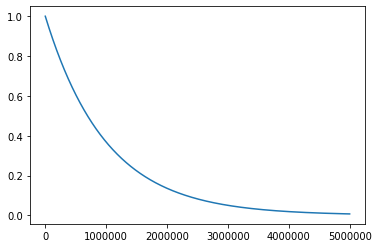

In [36]:
plt.plot(time, epsilon)
plt.show()